In [1]:
#import numpy and pandas
import numpy as np
import pandas as pd

# set matplotlib as inline 
import matplotlib as plt 
import seaborn as seamen
%matplotlib inline

In [2]:
df = pd.read_csv('callsFile.csv')
print(df)

             lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...  19003.0   
99489 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df['zip'].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().iloc[:5]


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
df['title'].nunique()

110

In [8]:
#or example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. *
df['reason'] = df['title'].apply(lambda title:title.split(":")[0])


In [9]:
df['reason'].value_counts().iloc[:5]

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

In [10]:
# create a plot using seaborn 

<AxesSubplot:xlabel='reason', ylabel='count'>

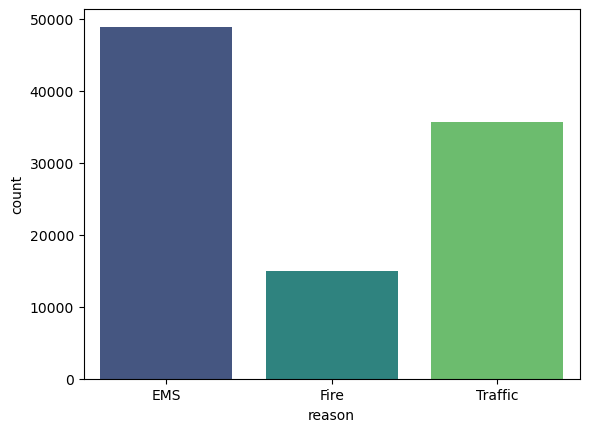

In [11]:
seamen.countplot(x='reason', data=df,  palette='viridis')


In [12]:
#Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? 
#basically check data type 
type(df['timeStamp'].iloc[0]) # this is checking 

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp']) # converted 

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of the Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:"Wed",3:"thurs",4:'Fri', 5:'Sat', 6:'Sun'}

In [16]:
df['Day of the Week'] = df['Day of the Week'].map(dmap)

TypeError: 'module' object is not callable

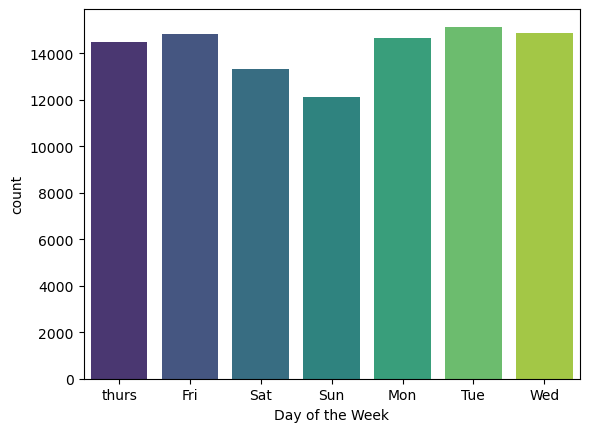

In [17]:
seamen.countplot(x='Day of the Week', data=df,palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0)